as K-means works on distance of centroid mechanims, for simple dataset it is easy to find the perfect clusters but when the dataset becomes complex K-means fails to find out the correct clusters

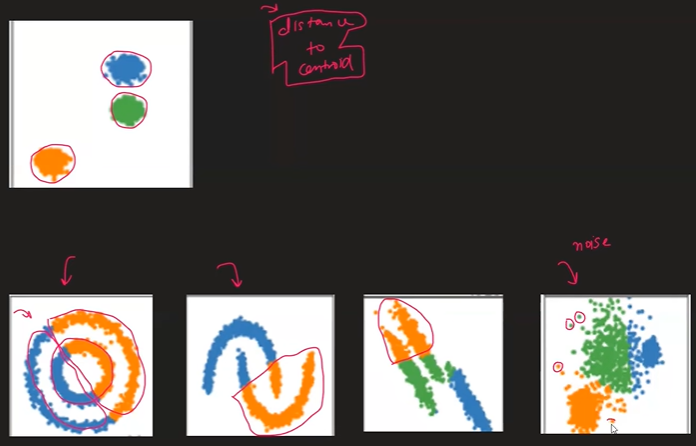

## Hierarichal Clustering
- Here will be not having any centroids with respect to each clsuter
It is often associated with heatmaps means the columns represent different samples and the rows represent measurements from different genes
- It orders the rows and/or the columns based on similarity which makes it easy to see correlations in the data
- A heatmap is a 2d visulaization where value in a matrix are represented with colors. each cell's color represents a numerical value. Warmer colors = higher values (red, orange), Cooler colors = lower values (blue, green)

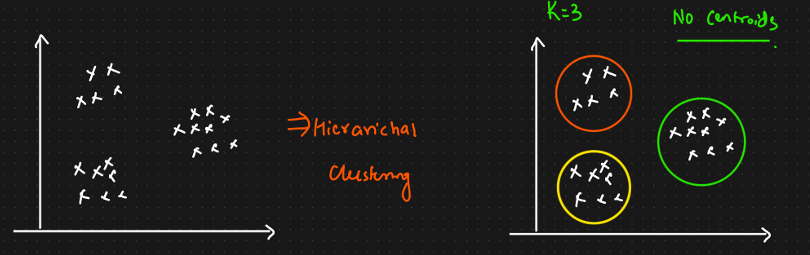

### Benefits
- widely applicable to find out the cluster
- because of making dendrograms, will be able to find out the most similar points to each other at every stage

### Limitation
- can't use for huge dataset as it creates dendrograms
- it will take more time than k-means when the dataset is huge

### Types of Hierarichal Clustering
- Agglomerative Clustering -> it means combining
- Divisive Clustering -> it means dividing , reverse of agglomerative cluster approach

### Agglomerative Clustering
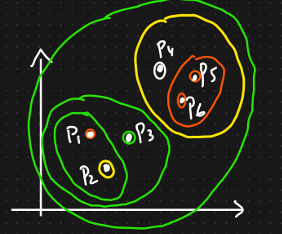

Steps in Natural terms:
- For each data point, initially will consider it as a separate cluster
- Find out the nearest point and create a new cluster
- Keep on doing the step2 process until we get a single cluster

Pseudo Algorithm:
- Initialize the Proximity Matrix (means if we have n points then make a matrix of nXn and put the distance)
- Make each point a cluster
- Inside a loop
    - merge the 2 closest clusters
    - update the proximity matrix
- until only one cluster is left

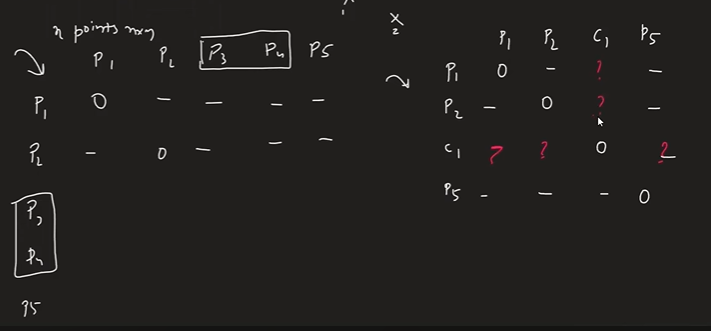

### Dendrogram
- It indicates both the similarity and the order that the clusters were formed. shortest length branch means most similar while longest length branch means not so similar
- so as we covered all the points n single cluster, now to decide how many clusters will be having in the dataset will be using "Dendrogram"
- all the data points will be in x-axis and y-axis will be having Eucledian distance
- Steps:
    - create the dendrogram by combining or divide the cluster one by one based on distance where the height of the block will be the eucledian distance or cosine similarity
    - when we combine from bottom-to-top, will be using agglomerative clustering
    - when we divide from top-to-bottom, will be using divisive clustering
    - K values means number of cluster will be selected based on the Eucledian distance threshold
    - whatever threshold will be taking, will create a line in such a way that the number of intersept points will be the K value
    - so means if we decrease the eucledian distance threshold, the number of clusters will increase

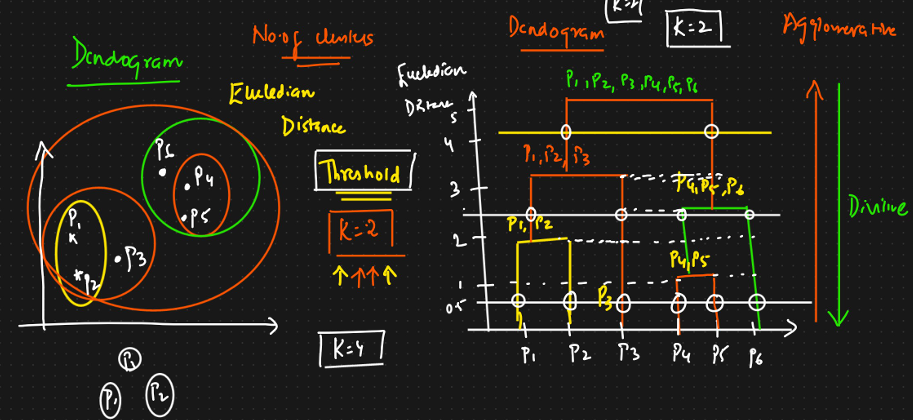

NOTE: selecting the eucledian distance threshold will be a challenge, with the help of dendrogram, there is a simple hack that is **" try to find out the longest vertical line (|) such that none of the horizontal line (--) passes through it"** here the horizontal line means the lines which are made when we extend the block line and not the threshold line

## Types of Agglomerative Clustering
the difference is here only in how we are calculating the distance between two clusters

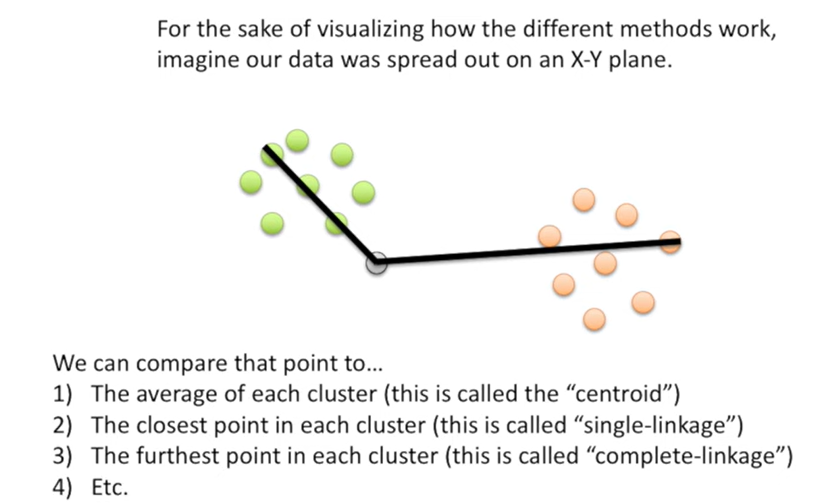
- Min (Single-link): it works good when there is enough separation between the two clusters and not works good when outliers and noise are present
- Max (Complete link): it will control well the outliers and noise but the disadvantage is when the size of clusters are different and has huge size difference then it will not works good
- Average: advantages and disadvantages lies between min and max technique
- Ward (Centroids): here the key factor is we minimize the variance (sklearn default technique)

## K Means vs Hierarichal Clustering
- If dataset is huge, use K Means Clustering and if the dataset is small, use Hierarichal Clustering as in this will creating dendrogram which will be not clearly seen as dataset increases
- K Means CLustering is only applicable for Numerical Dataset while Hierarichal Clustering is used for numerical dataset as well as for variety of data everywhere we can find cosine similarity
- In K Means will be having centroids using the Elbow method which might sometimes be difficult to find out the number of centroids

## Practical of Agglomerative Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris
dataset=load_iris()

In [8]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

applying PCA to reduce the features

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_sclaed=pca.fit_transform(df_scaled)

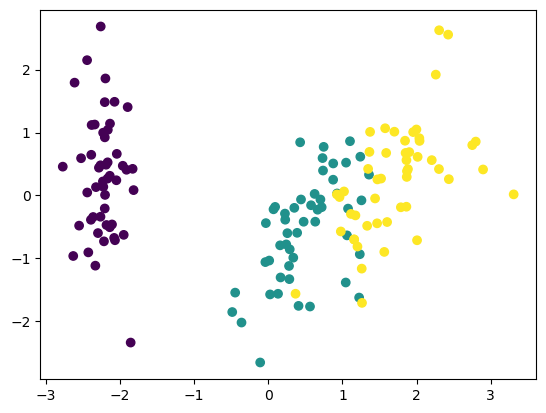

In [13]:
plt.scatter(pca_sclaed[:,0],pca_sclaed[:,1],c=dataset['target'])

creating dendrogram

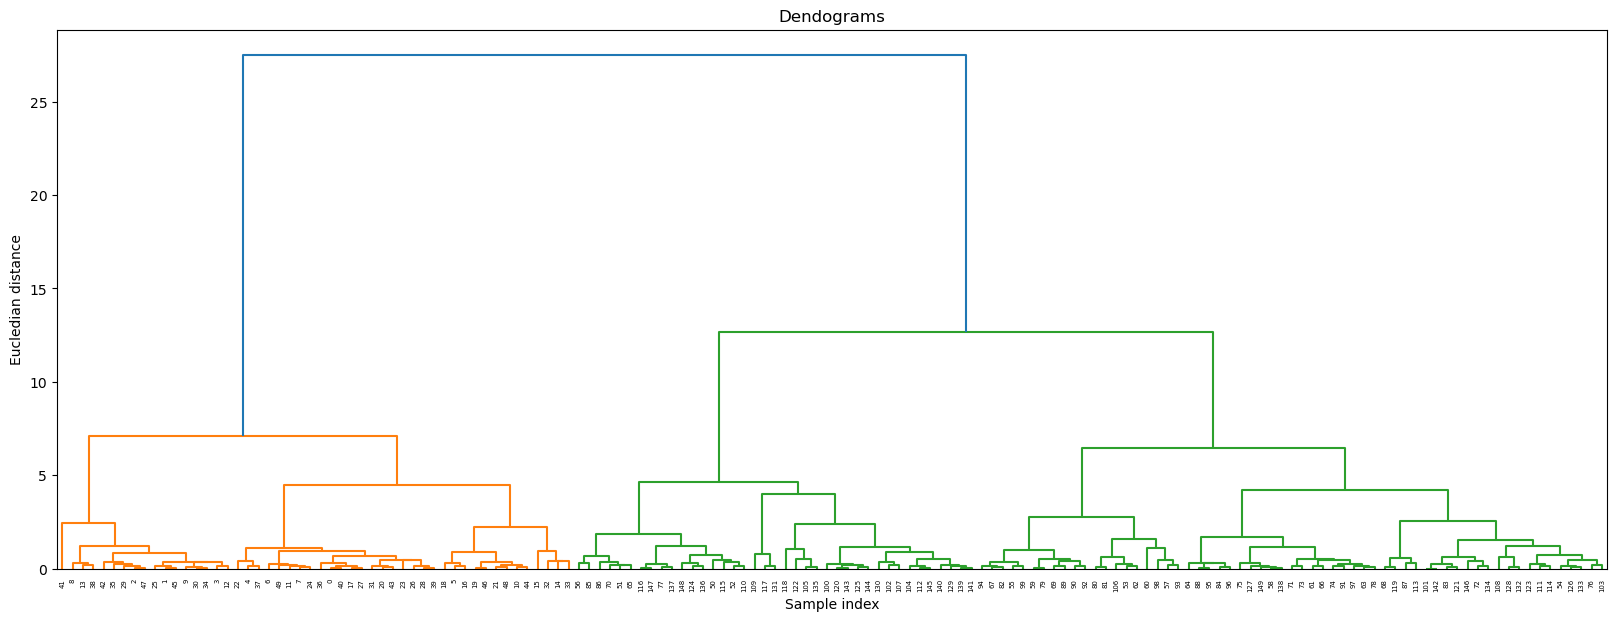

In [ ]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title("Dendrograms")

sc.dendrogram(sc.linkage(pca_sclaed,method='ward'))
plt.xlabel("Sample index")
plt.ylabel("Eucledian distance")
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,linkage='ward')
cluster.fit(pca_sclaed)

AgglomerativeClustering()

In [19]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

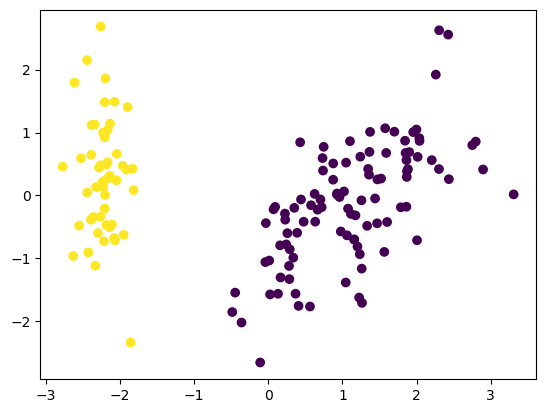

In [20]:
plt.scatter(pca_sclaed[:,0],pca_sclaed[:,1],c=cluster.labels_)